# Star Wars Survey

While waiting for **Star Wars: The Force Awakens** to come out, the team at *FiveThirtyEight* became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that **“The Empire Strikes Back”** is clearly the best of the bunch?

## Overview

In [1]:
# Read the data set
import numpy as np
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
# Review the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

At a glance, the data set contains some invalid values such as '*NaN*' or '*Response*'.

Let's first remove any rows where *RespondentID* is missing.

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

## Cleaning and Mapping Yes/No Columns

Take a look at the next two columns, which are:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent *Yes/No* questions. They can also be *NaN* where a respondent chooses not to answer a question. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values *True*, *False*, and *NaN*.

In [4]:
yes_no = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [5]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, *Which of the following Star Wars films have you seen? Please select all that apply.*

The columns for this question are:
- *Which of the following Star Wars films have you seen? Please select all that apply.* - Whether or not the respondent saw *Star Wars: Episode I The Phantom Menace.*
- *Unnamed: 4* - Whether or not the respondent saw *Star Wars: Episode II Attack of the Clones.*
- *Unnamed: 5* - Whether or not the respondent saw *Star Wars: Episode III Revenge of the Sith.*
- *Unnamed: 6* - Whether or not the respondent saw *Star Wars: Episode IV A New Hope.*
- *Unnamed: 7* - Whether or not the respondent saw *Star Wars: Episode V The Empire Strikes Back.*
- *Unnamed: 8* - Whether or not the respondent saw *Star Wars: Episode VI Return of the Jedi.*

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is *NaN*, the respondent either didn't answer or didn't see the movie. Let's assume that they didn't see the movie.

We'll convert each of these columns to a Boolean, then rename the columns to something more intuitive (using *seen_1* to indicate whether the respondent saw *Star Wars: Episode I The Phantom Menace*, *seen_2* for *Star Wars: Episode II Attack of the Clones*, and so on).

In [6]:
cols = star_wars.columns[3: 9]

# Create mapping dictionary
movie_map = {np.nan: False}
for movie in star_wars.iloc[0, 3:9]:
    movie_map[movie] = True
col_map = {}
new_cols = ['seen_{}'.format(i) for i in range(1, 7)]
for i in range(6):
    col_map[cols[i]] = new_cols[i]

# Convert the columns value to boolean
for col in cols:
    star_wars[col] = star_wars[col].map(movie_map)
    
# Rename the columns
star_wars.rename(columns=col_map, inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. The order of movies/columns is the same as the previous checkbox columns. We'll rename the columns as before and convert their data to numeric type.

In [7]:
cols_rank = star_wars.columns[9: 15]
# Convert values to float type
star_wars[cols_rank] = star_wars[cols_rank].astype(float)

# Rename the columns
col_map_rank = {}
new_cols_rank = ['rank_{}'.format(i) for i in range(1, 7)]
for i in range(6):
    col_map_rank[cols_rank[i]] = new_cols_rank[i]
star_wars.rename(columns=col_map_rank, inplace=True)

## Finding the Highest-Ranked Movie

In [9]:
# Compute the mean of each ranking column
ranking = star_wars[new_cols_rank].mean()
ranking

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

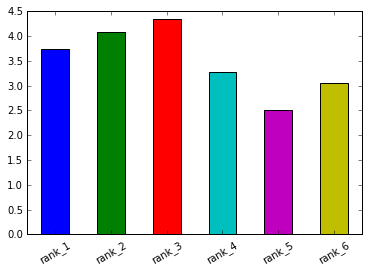

In [15]:
# Create a bar chart
%matplotlib inline
ranking.plot.bar(rot=30)

The highest-ranked movie is *Star Wars: Episode V The Empire Strikes Back*, while the lowest-ranked is *Star Wars: Episode III Revenge of the Sith*. It looks like the "original" movies are rated much more highly than the newer ones.

## Finding the Most Viewed Movie

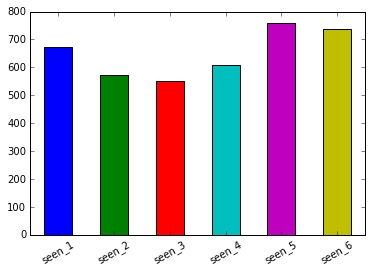

In [16]:
# Plot the total of views
star_wars[new_cols].sum().plot.bar(rot=30)

Comparing to what we saw earlier in the movie ranking, it appears that the most viewed movie is the same movie which has the highest-ranking, and vice versa. We can say the original movies are more popular and loved than the newer movies.

## Exploring the Data by Binary Segments

We'll split the data into two groups based on whether or not the respondents are Star Wars fans, then redo the previous analysis.

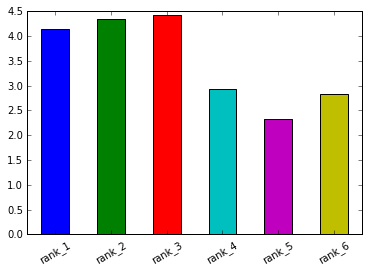

In [24]:
# Split the data
fan = star_wars[star_wars.iloc[:, 2] == True]
not_fan = star_wars[star_wars.iloc[:, 2] != True]

# Plot the ranking by star wars fan
fan[new_cols_rank].mean().plot.bar(rot=30)

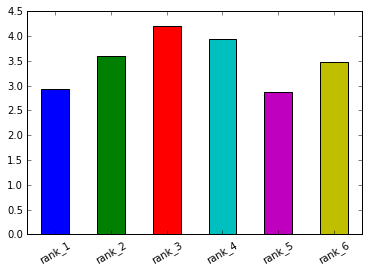

In [27]:
# Plot the ranking not by star wars fan
not_fan[new_cols_rank].mean().plot.bar(rot=30)

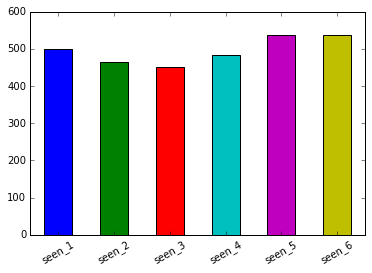

In [28]:
# Plot the total of views by star wars fan
fan[new_cols].sum().plot.bar(rot=30)

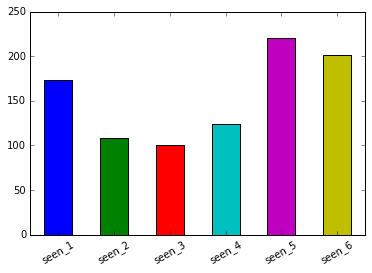

In [29]:
# Plot the total of views not by star wars fan
not_fan[new_cols].sum().plot.bar(rot=30)

## Conclusion
Generally, the highest-ranked and most viewed movie stay the same, regardless of the fact the respondents are star wars fan or not. This shows *Star Wars: Episode V The Empire Strikes Back* is clearly the best Star Wars movie. We also found that *Star Wars: Episode III Revenge of the Sith* is the worst of the franchise.

Another interesting fact can be observed is that *Star Wars: Episode I The Phantom Menace*, despite being disliked by fans - who prefer the original movies, was highly ranked by non-fans (second only to the Episode V). This suggests Episode I wasn't really doing worse than the originals, and now we know where the low-rankings came from.